# Data preprocessing for house price prediction

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('dataset.csv')
df = pd.DataFrame(data)

In [3]:
def save_df(description):
    df.to_csv(f'new_dataset_checkpoint_{description}.csv', index=False)

In [4]:
df

,Tipologia,Contratto,Piano,Piani edificio,Ascensore,Superficie,Locali,Camere da letto,Bagni,Terrazzo,...,Climatizzazione,Spese condominio,Spese riscaldamento,Disponibilità,Uso edificio attuale,Unità,Data inizio e fine lavori,Totale piani edificio,Posti Auto,Spese aggiuntive
0,Appartamento | Intera proprietà | Classe immob...,Vendita,3,3.0,No,60 m²,2,1.0,1,Sì,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Appartamento | Intera proprietà | Classe immob...,Vendita,3,3.0,Sì,50 m²,2,1.0,1,Sì,...,"Autonomo, freddo/caldo",€ 40/mese,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Appartamento | Intera proprietà | Classe immob...,Vendita,Piano terra,2.0,No,28 m²,1,1.0,1,No,...,"Autonomo, freddo/caldo",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Appartamento | Nuda proprietà | Classe immobil...,Vendita,1,7.0,Sì,80 m²,3,2.0,2,Sì,...,NaN,€ 70/mese,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Appartamento | Intera proprietà | Classe immob...,Vendita,1,4.0,Sì,103 m²,3,2.0,2,Sì,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26009,Appartamento | Intera proprietà,Vendita,1,2.0,No,60 m²,2,1.0,1,No,...,Predisposizione impianto,€ 20/mese,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26010,Appartamento | Intera proprietà | Immobile di ...,Vendita,5,6.0,Sì,217 m²,5,3.0,3,Sì,...,"Centralizzato, freddo/caldo",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26011,Appartamento | Nuda proprietà | Classe immobil...,Vendita,1,3.0,Sì,120 m²,3,2.0,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26012,Appartamento | Intera proprietà,Vendita,2,3.0,No,100 m²,4,3.0,2,No,...,Autonomo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(f'Duplicates in the dataset: {len(df) - len(df.drop_duplicates())}')

Duplicates in the dataset: 1463


In [6]:
# Clean the dataset from duplicates
df.drop_duplicates(inplace=True)

In [7]:
# Remove data leakage
df.drop('Prezzo al m²', axis=1, inplace=True)

In [8]:
def create_nans_columns_df():
    nans_dict = {column: [df[column].isna().sum(), 
                            round(df[column].isna().sum() / len(df) * 100, 3)] 
                   for column in df.columns}
    nans_df = pd.DataFrame(nans_dict, ['NaNs', 'NaNs in %'])
    nans_df = nans_df.transpose()
    nans_df['NaNs'] = nans_df['NaNs'].astype(int)
    return nans_df

In [9]:
nans_columns_df = create_nans_columns_df()

In [10]:
nans_columns_df

,NaNs,NaNs in %
Tipologia,1,0.004
Contratto,1,0.004
Piano,267,1.088
Piani edificio,1029,4.191
Ascensore,1333,5.430
Superficie,116,0.472
Locali,180,0.733
Camere da letto,888,3.617
Bagni,668,2.721
Terrazzo,2899,11.808


In [11]:
nans_columns_df[nans_columns_df['NaNs in %'] > 20]

,NaNs,NaNs in %
"Box, posti auto",13929,56.735
Climatizzazione,10026,40.837
Spese condominio,5155,20.997
Spese riscaldamento,19762,80.494
Disponibilità,24408,99.418
Uso edificio attuale,24401,99.389
Unità,24446,99.572
Data inizio e fine lavori,24443,99.560
Totale piani edificio,24392,99.352
Posti Auto,24444,99.564


In [12]:
# Remove the columns with more than 60% of NaN values
df = df.dropna(axis=1, thresh= .4 * len(df))

In [13]:
df.loc[0].isna()

Tipologia           False
Contratto           False
Piano               False
Piani edificio      False
Ascensore           False
Superficie          False
Locali              False
Camere da letto     False
Bagni               False
Terrazzo            False
Riscaldamento       False
Prezzo              False
Cucina               True
Arredato             True
Balcone              True
Box, posti auto      True
Climatizzazione      True
Spese condominio     True
Name: 0, dtype: bool

In [14]:
def create_nans_rows_df():
    nans_dict = {row: [df.loc[row].isna().sum(), 
                            round(df.loc[row].isna().sum() / len(df.columns) * 100, 3)] 
                   for row in range(len(df))}
    nans_df = pd.DataFrame(nans_dict, ['NaNs', 'NaNs in %'])
    nans_df = nans_df.transpose()
    nans_df['NaNs'] = nans_df['NaNs'].astype(int)
    return nans_df

In [15]:
# After elements removal change the index
df.index = list(range(len(df)))

In [16]:
nans_rows_df = create_nans_rows_df()

In [17]:
nans_rows_df

,NaNs,NaNs in %
0,6,33.333
1,0,0.000
2,1,5.556
3,1,5.556
4,2,11.111
...,...,...
24546,1,5.556
24547,2,11.111
24548,5,27.778
24549,1,5.556


In [18]:
df = df[df.isna().sum(axis=1) <= 3]

In [19]:
len(df)

21036

In [20]:
# After elements removal change the index
df.index = list(range(len(df)))

In [21]:
nans_rows_df[nans_rows_df['NaNs'] < 1]

,NaNs,NaNs in %
1,0,0.0
7,0,0.0
15,0,0.0
20,0,0.0
24,0,0.0
...,...,...
24492,0,0.0
24499,0,0.0
24522,0,0.0
24524,0,0.0


In [22]:
save_df('cleaned_columns')

In [23]:
all_unique_categories = set()

for categories in list(dict(df['Tipologia'].value_counts()).keys()):
    splitted_categories = categories.split(' | ')
    for category in splitted_categories:
        all_unique_categories.add(category)
        
empty_lists = [[] for category in all_unique_categories]
categories_dict = dict(zip(all_unique_categories, empty_lists))
for house_number in range(len(df)):
    for key, value in categories_dict.items():
        if key in df.loc[house_number, 'Tipologia']:
            value.append(1)
        else:
            value.append(0)

categories_df = pd.DataFrame(categories_dict)

In [24]:
df = pd.concat([df, categories_df], axis=1)

In [25]:
df.drop('Tipologia', axis=1, inplace=True)

In [26]:
save_df('encoded_type')

In [27]:
property_income = []

for contract in df['Contratto']:
    if 'Immobile a reddito' in contract:
        property_income.append(1)
    else:
        property_income.append(0)

In [28]:
df.rename(columns={'Contratto': 'Immobile a reddito'}, inplace=True)

In [29]:
len(property_income)

21036

In [30]:
df['Immobile a reddito'] = property_income

In [31]:
save_df('encoded_contract')

In [32]:
floors_dict = {
    '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10,
    '11': 11, '12': 12, '13': 13, '14': 14, '15': 15, '20': 20, '23': 23, '27': 27,
    'Piano terra': 0,
    'Piano rialzato': 0.5,
    'Seminterrato': -1
}

In [33]:
house_number = 0
for floor in df['Piano']:
    if df.loc[house_number, 'Piano'] in floors_dict:
        df.loc[house_number, 'Piano'] = floors_dict[floor]
    elif isinstance(floor, str):
        df.loc[house_number, 'Piano'] = -2
    house_number += 1

In [34]:
df['Piano'].value_counts()

Piano
1      4097
0      3895
2      3248
3      2466
-2     2339
4      1720
5      1073
0.5     698
6       519
7       361
-1      271
8       210
9        34
10       14
13        8
11        5
14        4
12        4
23        2
27        1
20        1
15        1
Name: count, dtype: int64

In [35]:
df['Piano'] = df['Piano'].fillna(-2)

C:\Users\kevin\AppData\Local\Temp\ipykernel_3492\3595995499.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Piano'] = df['Piano'].fillna(-2)


In [36]:
pd.set_option('display.max_rows', 10)

In [37]:
save_df('floors_encoded_3')

In [38]:
df['Piani edificio'].value_counts()

Piani edificio
5.0     4549
4.0     4364
3.0     3645
2.0     2845
6.0     1580
        ... 
85.0       1
33.0       1
23.0       1
26.0       1
30.0       1
Name: count, Length: 27, dtype: int64

In [39]:
df['Piani edificio'].isna().sum()

178

In [40]:
df['Piani edificio'].describe()

count    20858.000000
mean         4.336418
std          2.270088
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max        110.000000
Name: Piani edificio, dtype: float64

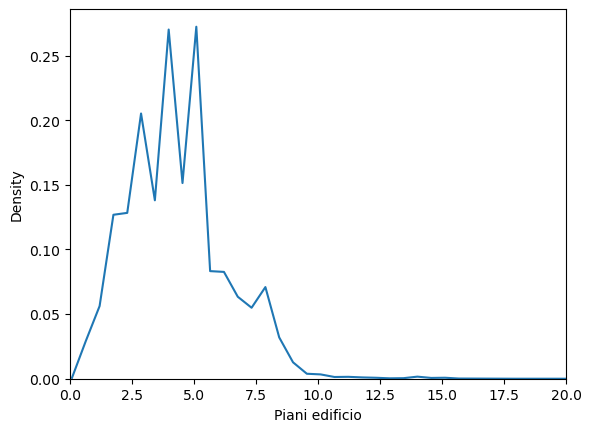

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(df['Piani edificio'])
plt.xlim([0, 20])
plt.show()

In [42]:
df['Piani edificio'] = df['Piani edificio'].fillna(df['Piani edificio'].median())

In [43]:
df['Piani edificio'] = df['Piani edificio'].astype(int)

In [44]:
df['Piani edificio'].value_counts()

Piani edificio
5     4549
4     4542
3     3645
2     2845
6     1580
      ... 
85       1
33       1
23       1
26       1
30       1
Name: count, Length: 27, dtype: int64

In [45]:
pd.set_option('display.max_rows', 10)

In [46]:
save_df('building_floors_4')

In [47]:
df['Ascensore'].isna().sum()

275

In [48]:
df['Ascensore'].value_counts()

Ascensore
Sì    14100
No     6661
Name: count, dtype: int64

In [49]:
df['Ascensore'] = df['Ascensore'].fillna('No')

In [50]:
df['Ascensore'] = df['Ascensore'].replace({'Sì': 1, 'No': 0})

C:\Users\kevin\AppData\Local\Temp\ipykernel_3492\1412948510.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Ascensore'] = df['Ascensore'].replace({'Sì': 1, 'No': 0})


In [51]:
save_df('elevators_encoded_5')

In [52]:
df['Superficie_pulita'] = df['Superficie'].str.extract(r'(\d{1,3}(?:\.\d{3})*|\d+)\s*m²(?=[^\d]*$)')

In [53]:
df['Superficie_pulita'].isna().sum()

0

In [54]:
df['Superficie_pulita'] = df['Superficie_pulita'].fillna('0')

In [55]:
df['Superficie_pulita'] = df['Superficie_pulita'].str.replace('.', '', regex=False)

In [56]:
df['Superficie_pulita'] = df['Superficie_pulita'].astype(int)

In [57]:
df['Superficie'] = df['Superficie_pulita']

In [58]:
df.drop('Superficie_pulita', axis=1, inplace=True)

In [59]:
df['Superficie'].replace({0: df['Superficie'].median()})

0         50
1         28
2         80
3        103
4         32
        ... 
21031    240
21032     60
21033    217
21034    100
21035    180
Name: Superficie, Length: 21036, dtype: int32

In [60]:
save_df('surface_encoded_6')

In [61]:
list(dict(df['Locali'].value_counts()).keys())

['3', '2', '4', '5+', '5', '1']

In [62]:
pd.set_option('display.max_rows', None)

In [63]:
df['Locali'] = df['Locali'].replace({'5+': 6})

In [64]:
for house_number in range(len(df)):
    try:
        if '3+ bagni' in df.loc[house_number, 'Locali']:
            df.loc[house_number, 'Bagni'] = 4
        elif '2 bagni' in df.loc[house_number, 'Locali']:
            df.loc[house_number, 'Bagni'] = 2
        elif '3 bagni' in df.loc[house_number, 'Locali']:
            df.loc[house_number, 'Bagni'] = 3
        elif '1 bagno' in df.loc[house_number, 'Locali']:
            df.loc[house_number, 'Bagni'] = 1
    except TypeError:
        pass

In [65]:
for house_number in range(len(df)):
    try:
        if '1 locale' in df.loc[house_number, 'Locali']:
            df.loc[house_number, 'Locali'] = 1
        elif '5+ locali' in df.loc[house_number, 'Locali']:
            df.loc[house_number, 'Locali'] = 6
        elif '5 locali' in df.loc[house_number, 'Locali']:
            df.loc[house_number, 'Locali'] = 5
        elif '4 locali' in df.loc[house_number, 'Locali']:
            df.loc[house_number, 'Locali'] = 4
        elif '3 locali' in df.loc[house_number, 'Locali']:
            df.loc[house_number, 'Locali'] = 3
        elif '2 locali' in df.loc[house_number, 'Locali']:
            df.loc[house_number, 'Locali'] = 2
    except TypeError:
        pass

In [66]:
df['Locali'] = pd.to_numeric(df['Locali'], errors='coerce').astype('Int64')

In [67]:
df['Locali'] = df['Locali'].fillna(0)

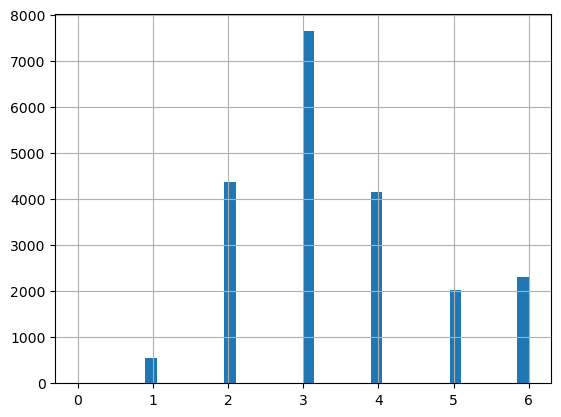

In [68]:
df['Locali'].hist(bins=40)
plt.show()

In [69]:
df['Locali'] = df['Locali'].replace({0: df['Locali'].median()})

In [70]:
save_df('locals_encoded_7')

In [71]:
df['Camere da letto'].isna().sum()

180

In [72]:
df['Camere da letto'].value_counts()

Camere da letto
2.0     8467
1.0     5005
3.0     4819
4.0     1584
5.0      552
6.0      185
7.0       94
8.0       55
0.0       25
10.0      22
9.0       13
12.0       7
11.0       6
14.0       5
15.0       4
13.0       3
18.0       3
16.0       2
24.0       2
20.0       1
31.0       1
28.0       1
Name: count, dtype: int64

In [157]:
pd.set_option('display.max_rows', 10)

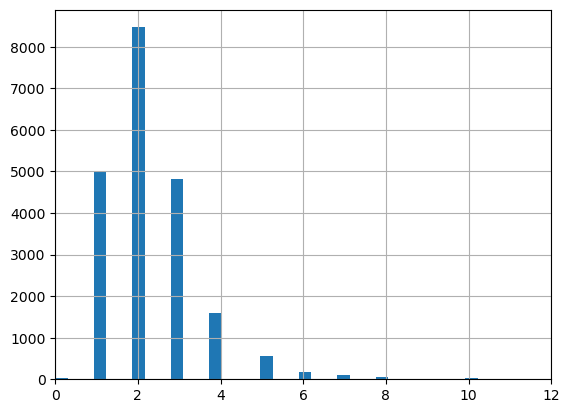

In [74]:
df['Camere da letto'].hist(bins=100)
plt.xlim([0, 12])
plt.show()

In [75]:
df['Camere da letto'] = df['Camere da letto'].fillna(df['Camere da letto'].median())

In [76]:
df['Camere da letto'] = df['Camere da letto'].astype(int)

In [77]:
save_df('bedrooms_encoded_8')

In [78]:
df['Bagni'].value_counts()

Bagni
1     9658
2     8219
3     2007
3+    1089
Name: count, dtype: int64

In [79]:
df['Bagni'].isna().sum()

63

In [80]:
df['Bagni'] = df['Bagni'].fillna(0)

In [81]:
df['Bagni'] = df['Bagni'].replace({'3+': 4})

In [82]:
df['Bagni'] = df['Bagni'].astype(int)

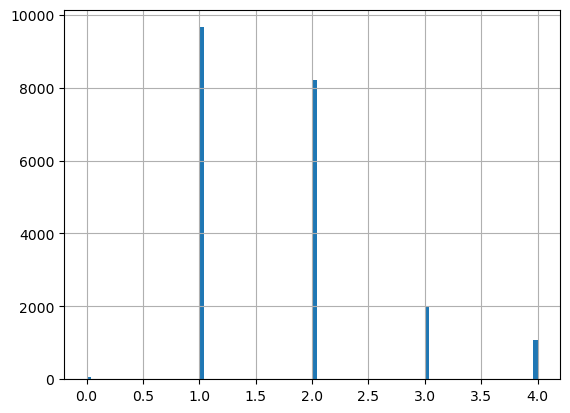

In [83]:
df['Bagni'].hist(bins=100)
plt.show()

In [84]:
df['Bagni'] = df['Bagni'].fillna(df['Bagni'].mode())

In [85]:
save_df('bathrooms_encoded_9')

In [86]:
df['Terrazzo'].value_counts()

Terrazzo
No    10806
Sì     9274
Name: count, dtype: int64

In [87]:
df['Terrazzo'].isna().sum()

956

In [88]:
df['Terrazzo'] = df['Terrazzo'].fillna('No')

In [89]:
df['Terrazzo'] = df['Terrazzo'].replace({'Sì': 1, 'No': 0})

C:\Users\kevin\AppData\Local\Temp\ipykernel_3492\3897600959.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Terrazzo'] = df['Terrazzo'].replace({'Sì': 1, 'No': 0})


In [90]:
save_df('terrace_encoded_10')

In [91]:
pd.set_option('display.max_rows', 10)

In [92]:
df['Riscaldamento'].value_counts()

Riscaldamento
Autonomo, a radiatori, alimentato a metano         4826
Autonomo, a radiatori, alimentato a gas            4786
Centralizzato, a radiatori, alimentato a metano    2817
Centralizzato, a radiatori, alimentato a gas       2113
Autonomo                                           1449
                                                   ... 
Autonomo, a pavimento, alimentato a gasolio           1
Autonomo, ad aria, alimentato a pellet                1
Autonomo, a stufa, alimentato a gasolio               1
Centralizzato, alimentato a solare                    1
Centralizzato, alimentato a fotovoltaico              1
Name: count, Length: 87, dtype: int64

In [93]:
df['Riscaldamento'].isna().sum()

470

In [94]:
df['Riscaldamento'] = df['Riscaldamento'].fillna('Riscaldamento assente')

In [95]:
all_unique_categories = set()

for categories in list(dict(df['Riscaldamento'].value_counts()).keys()):
    splitted_categories = categories.split(', ')
    for category in splitted_categories:
        all_unique_categories.add(category)
        
empty_lists = [[] for category in all_unique_categories]
categories_dict = dict(zip(all_unique_categories, empty_lists))
for house_number in range(len(df)):
    for key, value in categories_dict.items():
        if key in df.loc[house_number, 'Riscaldamento']:
            value.append(1)
        else:
            value.append(0)

categories_df = pd.DataFrame(categories_dict)

In [96]:
df = pd.concat([df, categories_df], axis=1)

In [97]:
df.drop('Riscaldamento', axis=1, inplace=True)

In [98]:
save_df('heating_encoded_11')

In [99]:
df['Prezzo'].isna().sum()

0

In [100]:
df = df.dropna(subset=['Prezzo'])

In [101]:
df['Prezzo'] =  df['Prezzo'].str.replace('€ ', '')

In [102]:
df['Prezzo'] = df['Prezzo'].str.replace('.', '')

In [103]:
df['Prezzo'] = df['Prezzo'].astype(int)

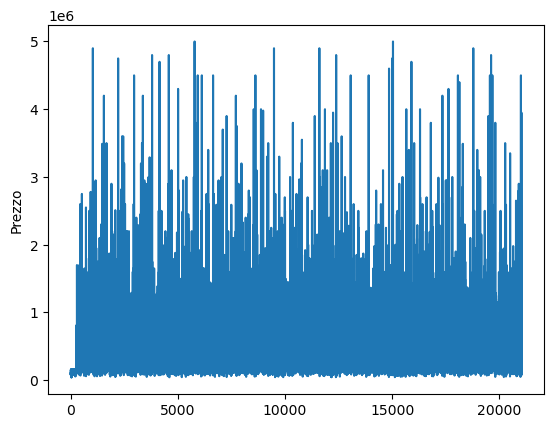

In [104]:
sns.lineplot(df['Prezzo'])
plt.show()

In [105]:
prices_count = df['Prezzo'].value_counts().sort_index()

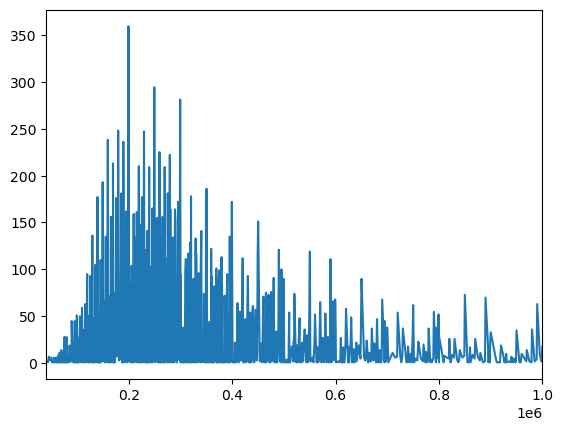

In [106]:
plt.plot(prices_count.index, prices_count.values)
plt.xlim([40_000, 1_000_000])
plt.show()

In [107]:
save_df('price_encoded_12')

In [108]:
df['Cucina'].value_counts()

Cucina
Cucina abitabile         11127
Cucina angolo cottura     4437
Cucina a vista            1881
Cucina semi abitabile     1630
Cucina cucinotto           928
Name: count, dtype: int64

In [109]:
df['Cucina'].isna().sum()

1033

In [110]:
df['Cucina'] = df['Cucina'].fillna('Cucina assente')

In [111]:
pd.get_dummies(df['Cucina']).astype(int)

,Cucina a vista,Cucina abitabile,Cucina angolo cottura,Cucina assente,Cucina cucinotto,Cucina semi abitabile
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,0,0,0,1
3,0,1,0,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
21031,0,0,0,0,0,1
21032,0,0,0,0,0,1
21033,0,1,0,0,0,0
21034,0,1,0,0,0,0


In [112]:
df = pd.concat([df, pd.get_dummies(df['Cucina']).astype(int)], axis=1)

In [113]:
df.drop('Cucina', axis=1, inplace=True)

In [114]:
save_df('kitchen_encoded_13')

In [115]:
df['Arredato'].isna().sum()

2279

In [116]:
df['Arredato'].value_counts()

Arredato
No                       13721
Parzialmente Arredato     2584
Sì                        1950
Solo Cucina Arredata       502
Name: count, dtype: int64

In [117]:
df['Arredato'] = df['Arredato'].fillna('No')

In [118]:
decor_dict = {'No': 0, 'Sì': 1, 'Parzialmente Arredato': .75, 'Solo Cucina Arredata': .25}

In [119]:
df['Arredato'] = df['Arredato'].replace(decor_dict)

C:\Users\kevin\AppData\Local\Temp\ipykernel_3492\3976576950.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Arredato'] = df['Arredato'].replace(decor_dict)


In [120]:
save_df('decor_encoded_14')

In [121]:
df['Balcone'].isna().sum()

798

In [122]:
df['Balcone'].value_counts()

Balcone
Sì    12845
No     7393
Name: count, dtype: int64

In [123]:
df['Balcone'] = df['Balcone'].fillna('No')

In [124]:
df['Balcone'] = df['Balcone'].replace({'Sì': 1, 'No': 0})

C:\Users\kevin\AppData\Local\Temp\ipykernel_3492\2336783822.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Balcone'] = df['Balcone'].replace({'Sì': 1, 'No': 0})


In [125]:
save_df('balcony_encoded_15')

In [126]:
df['Box, posti auto'].isna().sum()

11115

In [127]:
pd.set_option('display.max_rows', 10)

In [128]:
df['Box, posti auto'].value_counts()

Box, posti auto
1 in parcheggio/garage comune                                     4252
1 in box privato/box in garage                                    2054
1 in box privato/box in garage, 1 in parcheggio/garage comune      909
2 in parcheggio/garage comune                                      819
2 in box privato/box in garage                                     748
                                                                  ... 
30 in parcheggio/garage comune                                       1
12 in parcheggio/garage comune                                       1
2 in box privato/box in garage, 40 in parcheggio/garage comune       1
11 in parcheggio/garage comune                                       1
1 in box privato/box in garage, 13 in parcheggio/garage comune       1
Name: count, Length: 48, dtype: int64

In [129]:
df['Box, posti auto'].fillna(0, inplace=True)

C:\Users\kevin\AppData\Local\Temp\ipykernel_3492\3713106471.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Box, posti auto'].fillna(0, inplace=True)


In [130]:
df['Box, posti auto'] = df['Box, posti auto'].apply(lambda x: 1 if isinstance(x, str) else x)

In [131]:
save_df('parking_encoded_16')

In [132]:
df['Climatizzazione'].isna().sum()

7343

In [133]:
df['Climatizzazione'].value_counts()

Climatizzazione
Autonomo, freddo/caldo                    9372
Autonomo                                  1394
Autonomo, freddo                           913
Predisposizione impianto                   846
Freddo/caldo                               463
                                          ... 
Centralizzato, caldo                        27
Caldo                                       13
Predisposizione impianto, freddo/caldo       5
Assente, freddo/caldo                        2
Predisposizione impianto, caldo              1
Name: count, Length: 17, dtype: int64

In [134]:
df['Climatizzazione'] = df['Climatizzazione'].fillna('-1')

In [135]:
df['Climatizzazione'] = df['Climatizzazione'].apply(lambda x: 0 if 'Assente' in x else x)

In [136]:
df['Climatizzazione'] = df['Climatizzazione'].apply(lambda x: 1 if isinstance(x, str) and x != '-1' else x)

In [137]:
save_df('ac_encoded_17')

In [138]:
df['Spese condominio'].isna().sum()

2974

In [139]:
df['Spese condominio'].value_counts()

Spese condominio
Nessuna spesa condominiale    3271
€ 100/mese                    1364
€ 50/mese                     1298
€ 1/mese                      1074
€ 70/mese                      922
                              ... 
€ 266/mese                       1
€ 1.100/mese                     1
€ 665/mese                       1
€ 2.965/mese                     1
€ 2.000/mese                     1
Name: count, Length: 337, dtype: int64

In [140]:
df['Spese condominio'] = df['Spese condominio'].str.replace('€ ', '')

In [141]:
df['Spese condominio'] = df['Spese condominio'].str.replace('/mese', '')

In [142]:
df['Spese condominio'] = df['Spese condominio'].str.replace('Nessuna spesa condominiale', '0')

In [143]:
df['Spese condominio'] = df['Spese condominio'].str.replace('.', '')

In [144]:
df['Spese condominio'].fillna(-1, inplace=True)

C:\Users\kevin\AppData\Local\Temp\ipykernel_3492\3928037555.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Spese condominio'].fillna(-1, inplace=True)


In [145]:
df['Spese condominio'] = df['Spese condominio'].astype(int)

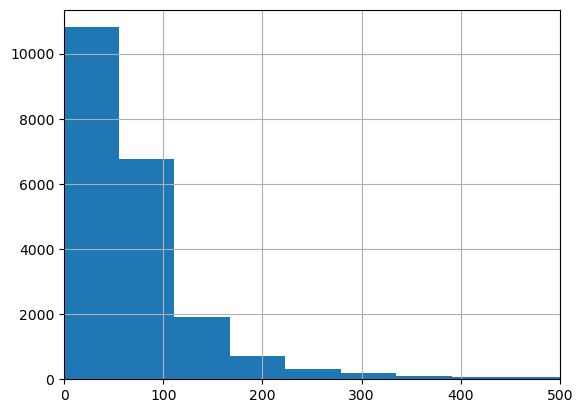

In [146]:
df['Spese condominio'].hist(bins=5000)
plt.xlim([0, 500])
plt.show()

In [147]:
df['Spese condominio'] = df['Spese condominio'].replace({-1: df['Spese condominio'].median()})

In [148]:
save_df('expenses_encoded_18')

In [149]:
df['Piano'].fillna(-2, inplace=True)

C:\Users\kevin\AppData\Local\Temp\ipykernel_3492\2416631780.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Piano'].fillna(-2, inplace=True)


In [150]:
df.isna().sum()

Immobile a reddito       0
Piano                    0
Piani edificio           0
Ascensore                0
Superficie               0
                        ..
Cucina abitabile         0
Cucina angolo cottura    0
Cucina assente           0
Cucina cucinotto         0
Cucina semi abitabile    0
Length: 66, dtype: int64

In [151]:
pd.set_option('display.max_rows', None)

In [152]:
len(df)

21036

In [153]:
Q1 = df['Prezzo'].quantile(.25)
Q3 = df['Prezzo'].quantile(.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [159]:
df = df[df['Prezzo'] < upper_bound]

In [161]:
df.to_csv('encoded_dataset.csv', index=False)